# Basic Stats with Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('iran_covid.csv')
df.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,cum_num_14_per_100000
345,2020-01-04,4,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
346,2020-01-03,3,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
347,2020-01-02,2,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
348,2020-01-01,1,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
349,2019-12-31,31,12,2019,0,0,Iran,IR,IRN,82913893.0,Asia,NaN


In [2]:
# Since this dataset only contains records of Covid-19 cases belonging to Iran, we can drop some of these columns.
df = df.drop(columns=['countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2019', 'continentExp'])
df.head()

,dateRep,day,month,year,cases,deaths,cum_num_14_per_100000
0,2020-12-14,14,12,2020,7451,247,192.392365
1,2020-12-13,13,12,2020,8201,221,199.024547
2,2020-12-12,12,12,2020,9594,232,205.297320
3,2020-12-11,11,12,2020,10403,284,210.672776
4,2020-12-10,10,12,2020,10223,295,214.963975


## Handling Duplicate Entries

In [3]:
df.loc[df.duplicated(subset=['dateRep'], keep=False)]

,dateRep,day,month,year,cases,deaths,cum_num_14_per_100000


In [4]:
# method 1
df.loc[df.duplicated(subset=['dateRep'], keep=False)]
df.drop(df.loc[df.duplicated(subset=['dateRep'], keep='first')].index)

,dateRep,day,month,year,cases,deaths,cum_num_14_per_100000
0,2020-12-14,14,12,2020,7451,247,192.392365
1,2020-12-13,13,12,2020,8201,221,199.024547
2,2020-12-12,12,12,2020,9594,232,205.297320
3,2020-12-11,11,12,2020,10403,284,210.672776
4,2020-12-10,10,12,2020,10223,295,214.963975
...,...,...,...,...,...,...,...
345,2020-01-04,4,1,2020,0,0,NaN
346,2020-01-03,3,1,2020,0,0,NaN
347,2020-01-02,2,1,2020,0,0,NaN
348,2020-01-01,1,1,2020,0,0,NaN


In [5]:
# method 2
df.drop_duplicates(subset=['dateRep', 'month'], keep='last', ignore_index=True)     # no subset -> all columns, reset index

,dateRep,day,month,year,cases,deaths,cum_num_14_per_100000
0,2020-12-14,14,12,2020,7451,247,192.392365
1,2020-12-13,13,12,2020,8201,221,199.024547
2,2020-12-12,12,12,2020,9594,232,205.297320
3,2020-12-11,11,12,2020,10403,284,210.672776
4,2020-12-10,10,12,2020,10223,295,214.963975
...,...,...,...,...,...,...,...
345,2020-01-04,4,1,2020,0,0,NaN
346,2020-01-03,3,1,2020,0,0,NaN
347,2020-01-02,2,1,2020,0,0,NaN
348,2020-01-01,1,1,2020,0,0,NaN


## Basic Analysis 

In [6]:
df.sum()

dateRep                  2020-12-142020-12-132020-12-122020-12-112020-1...
day                                                                   5407
month                                                                 2192
year                                                                706999
cases                                                              1108269
deaths                                                               52196
cum_num_14_per_100000                                              17594.8
dtype: object

In [7]:
df.count()      # number of cells with proper value (!= nan)
df = df.dropna()
df.count()

dateRep                  337
day                      337
month                    337
year                     337
cases                    337
deaths                   337
cum_num_14_per_100000    337
dtype: int64

In [8]:
df.cumsum()

,dateRep,day,month,year,cases,deaths,cum_num_14_per_100000
0,2020-12-14,14,12,2020,7451,247,192.392365
1,2020-12-142020-12-13,27,24,4040,15652,468,391.416912
2,2020-12-142020-12-132020-12-12,39,36,6060,25246,700,596.714232
3,2020-12-142020-12-132020-12-122020-12-11,50,48,8080,35649,984,807.387008
4,2020-12-142020-12-132020-12-122020-12-112020-1...,60,60,10100,45872,1279,1022.350983
...,...,...,...,...,...,...,...
332,2020-12-142020-12-132020-12-122020-12-112020-1...,5240,2164,672660,1108269,52196,17594.847464
333,2020-12-142020-12-132020-12-122020-12-112020-1...,5256,2165,674680,1108269,52196,17594.847464
334,2020-12-142020-12-132020-12-122020-12-112020-1...,5271,2166,676700,1108269,52196,17594.847464
335,2020-12-142020-12-132020-12-122020-12-112020-1...,5285,2167,678720,1108269,52196,17594.847464


0       7451
1      15652
2      25246
3      35649
4      45872
5      56895
6      67722
7      79283
8      91434
9     104775
10    118697
11    132318
12    146199
13    159520
14    172470
15    185872
16    199923
17    213884
18    241448
19    241448
Name: cases, dtype: int64


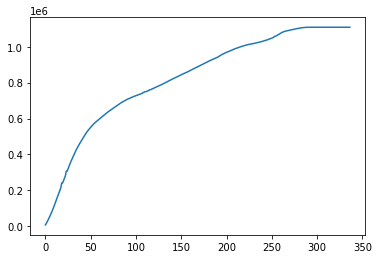

In [9]:
print(df.cases.cumsum(skipna=True)[:20])
plt.plot(df.cases.cumsum(skipna=True))
plt.show()

In [10]:
print(df.deaths.max(), df.deaths.idxmax())
df.loc[df.deaths.idxmax()]

955 23


dateRep                  2020-11-21
day                              21
month                            11
year                           2020
cases                         26483
deaths                          955
cum_num_14_per_100000       198.491
Name: 23, dtype: object

In [11]:
df.describe(include='all')

,dateRep,day,month,year,cases,deaths,cum_num_14_per_100000
count,337,337.000000,337.000000,337.0,337.000000,337.000000,337.000000
unique,337,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15.721068,6.433234,2020.0,3288.632047,154.884273,52.210230
std,NaN,8.787467,3.218597,0.0,3827.219814,140.220919,56.816333
min,NaN,1.000000,1.000000,2020.0,0.000000,0.000000,0.000000
25%,NaN,8.000000,4.000000,2020.0,1223.000000,59.000000,20.826425
50%,NaN,16.000000,6.000000,2020.0,2313.000000,127.000000,39.982443
75%,NaN,23.000000,9.000000,2020.0,3341.000000,211.000000,45.310862


## Percent Change

0           NaN
1     -0.105263
2      0.049774
3      0.224138
4      0.038732
         ...   
332         NaN
333         NaN
334         NaN
335         NaN
336         NaN
Name: deaths, Length: 337, dtype: float64


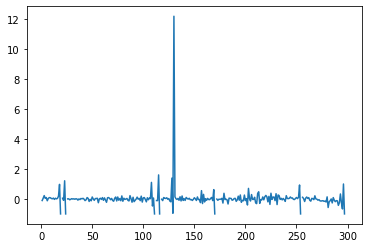

In [12]:
print(df.deaths.pct_change())
plt.plot(df.deaths.pct_change())
plt.show()

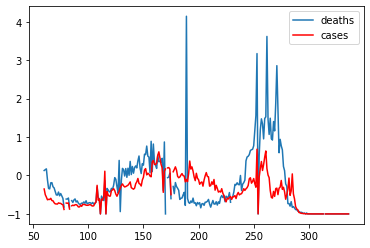

In [16]:
plt.plot(df.deaths.pct_change(periods=60))
plt.plot(df.cases.pct_change(periods=60), c='red')
plt.legend(['deaths', 'cases'])
plt.show()

## Calculating Correlation Coefficient Between Deaths and Cases

In [14]:
df.corr()   #.loc['cases', 'deaths']

,day,month,year,cases,deaths,cum_num_14_per_100000
day,1.000000,-0.128091,NaN,-0.028716,0.005227,-0.060742
month,-0.128091,1.000000,NaN,0.719348,0.771825,0.782642
year,NaN,NaN,NaN,NaN,NaN,NaN
cases,-0.028716,0.719348,NaN,1.000000,0.911855,0.903744
deaths,0.005227,0.771825,NaN,0.911855,1.000000,0.784155
cum_num_14_per_100000,-0.060742,0.782642,NaN,0.903744,0.784155,1.000000
